In [1]:
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D ,Activation,Dropout
from keras.layers import Flatten,Dense
from keras.optimizers import *
import numpy as np
from keras.preprocessing import image
from keras import backend as k

Train_dir="/content/drive/MyDrive/Desertation_3/agu_data/training"
Validation_dir="/content/drive/MyDrive/Desertation_3/agu_data/validation"
Testing_dir="/content/drive/MyDrive/Desertation_3/agu_data/testing"

img_width = 1500
img_height = 1500

no_training_sample = 392
no_validation_sample = 295
batch_size =5
print('DONE------')

if k.image_data_format() == 'channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)



from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator()


validation_datagen= ImageDataGenerator(rescale=1./255)


print('image of training')
training_generator = datagen.flow_from_directory(Train_dir,
                                                    batch_size=batch_size,
                                                    
                                                    class_mode='binary')

print("image of validation")
validation_generator = datagen.flow_from_directory(Validation_dir,
                                                        batch_size=batch_size,
                                                        class_mode='binary')

testing = datagen.flow_from_directory(Testing_dir, class_mode='binary', batch_size=batch_size)




DONE------
image of training
Found 392 images belonging to 2 classes.
image of validation
Found 295 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [2]:
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D ,Activation,Dropout
from keras.layers import Flatten,Dense



model = Sequential()
model.add(Convolution2D(50,kernel_size=3, activation='relu',input_shape=input_shape))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))

#model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import *
from tensorflow.keras.optimizers import RMSprop

rms = tf.keras.optimizers.RMSprop(learning_rate=0.05, rho=0.9)

model.compile(loss='binary_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1498, 1498, 50)    1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 749, 749, 50)      0         
_________________________________________________________________
flatten (Flatten)            (None, 28050050)          0         
_________________________________________________________________
dense (Dense)                (None, 32)                897601632 
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 897,603,577
Trainable params: 897,603,577
Non-trainable params: 0
__________________________________________

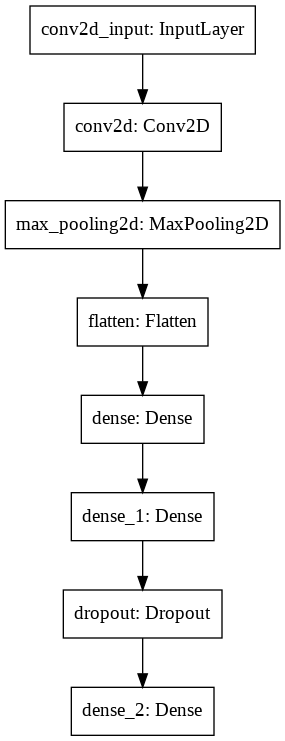

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


In [5]:
from keras.callbacks import History
history=History()

#steps_per_epoch = total_number_of_images / 8

model.fit_generator(
    training_generator,
    steps_per_epoch= no_training_sample//batch_size,#49
    epochs=1,
    callbacks=[history],
    validation_data = validation_generator,
    validation_steps=no_validation_sample//batch_size)





/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


InvalidArgumentError: ignored

In [ ]:
print(len(validation_generator))


59


In [ ]:
img_prediction = image.load_img('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/data/validation/MM/MM_1.bmp',  target_size=(1500,1000))
img_prediction = image.img_to_array(img_prediction)
img_prediction = np.expand_dims(img_prediction, axis =0)


In [ ]:
result = model.predict(img_prediction)
print(result)
if result[0][0] == 1:
  prediction = "all"
else :
  prediction = 'mm'

print(prediction)

[[0.]]
mm
